# Mapping with Cartopy

<div class="questions">  
### Questions

- What plotting options are available in Pyton?
- What mapping features are availble in Python?
</div>

<div class="objectives">  
### Objectives

- Learn different approaches to plots and mapping
- Learn about cartopy

</div>



## Introduction to matplotlib
A more general interface is available and a more structured approach to using `matplotlib` is helpful.

   - [PDF documentation](https://matplotlib.org/3.1.3/Matplotlib.pdf)
   - [Online gallery / cookbook](http://matplotlib.org/gallery.html)
   
Matplotlib fully embraces the python object-oriented model, but for some tasks the design of the object hierarchy is a little bit counter-intuitive. 
It's best to find a common pattern for building plots and stick to it. 

In [6]:
import matplotlib.pyplot as plt
import numpy as np

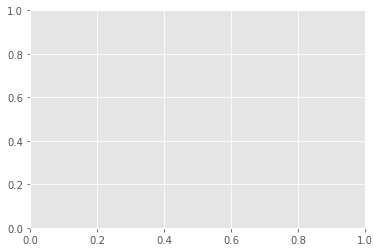

In [26]:
fig = plt.figure(figsize=(6, 4), facecolor="none")

ax = plt.subplot(111) # 1x1 array of plots, ax refers to the 1st of them

# Content is added to the blank axes instance
# ...

fig.savefig("test-figure.png", dpi=150)
plt.show()  # happens anyway !

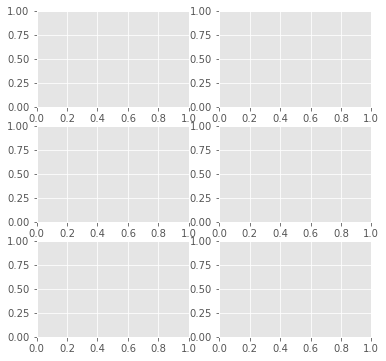

In [27]:
fig = plt.figure(figsize=(6,6), facecolor="none")

ax = plt.subplot(321)   # 3x2 array of plots, ax refers to the 1st of them
ax2 = plt.subplot(322) 

ax3 = plt.subplot(323) 
ax4 = plt.subplot(324) 

ax5 = plt.subplot(325) 
ax6 = plt.subplot(326) # 3x2 array of plots, ax6 refers to the last of them


# Content is added to the blank axes instance
# ...

fig.savefig("test-figure2.png", dpi=150)
plt.show()  # happens anyway !

In [28]:
# Demo example

# First, define some synthetic data

x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

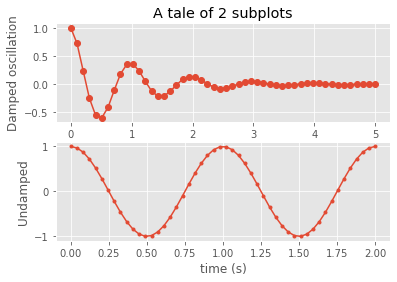

In [29]:
# Option 1
plt.subplot(211)
plt.plot(x1, y1, 'o-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(212)
plt.plot(x2, y2, '.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()

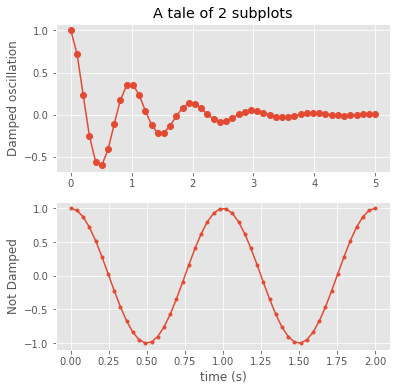

In [30]:
# My preference - option 2
# Set up the plot

fig = plt.figure(figsize=(6,6), facecolor="none")
ax  = plt.subplot(211)   # 2s1 array of plots, ax refers to the 1st of them
ax2 = plt.subplot(212) 

ax.plot(x1, y1, 'o-')
ax.set_title('A tale of 2 subplots')
ax.set_ylabel('Damped oscillation')

ax2.plot(x2, y2, '.-')
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Not Damped')
plt.show()

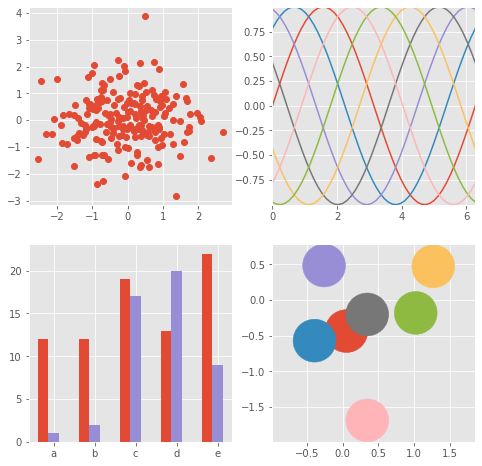

In [31]:
"""
==================
ggplot style sheet
==================

This example demonstrates the "ggplot" style, which adjusts the style to
emulate ggplot_ (a popular plotting package for R_).

These settings were shamelessly stolen from [1]_ (with permission).

.. [1] http://www.huyng.com/posts/sane-color-scheme-for-matplotlib/

.. _ggplot: http://ggplot2.org/
.. _R: https://www.r-project.org/

"""

plt.style.use('ggplot')


# This is another way to set up the axes objects
# and may be preferable, but whichever - choose one and stick with it !

fig, axes = plt.subplots(ncols=2, nrows=2)
ax1, ax2, ax3, ax4 = axes.ravel()
fig.set_size_inches((8,8))

# scatter plot (Note: `plt.scatter` doesn't use default colors)
x, y = np.random.normal(size=(2, 200))
ax1.plot(x, y, 'o')

# sinusoidal lines with colors from default color cycle
L = 2*np.pi
x = np.linspace(0, L)
ncolors = len(plt.rcParams['axes.prop_cycle'])
shift = np.linspace(0, L, ncolors, endpoint=False)
for s in shift:
    ax2.plot(x, np.sin(x + s), '-')
ax2.margins(0)

# bar graphs
x = np.arange(5)
y1, y2 = np.random.randint(1, 25, size=(2, 5))
width = 0.25
ax3.bar(x, y1, width)
ax3.bar(x + width, y2, width,
        color=list(plt.rcParams['axes.prop_cycle'])[2]['color'])
ax3.set_xticks(x + width)
ax3.set_xticklabels(['a', 'b', 'c', 'd', 'e'])

# circles with colors from default color cycle
for i, color in enumerate(plt.rcParams['axes.prop_cycle']):
    xy = np.random.normal(size=2)
    ax4.add_patch(plt.Circle(xy, radius=0.3, color=color['color']))
ax4.axis('equal')
ax4.margins(0)

plt.show()

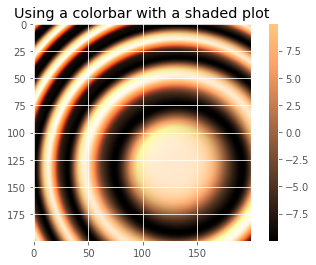

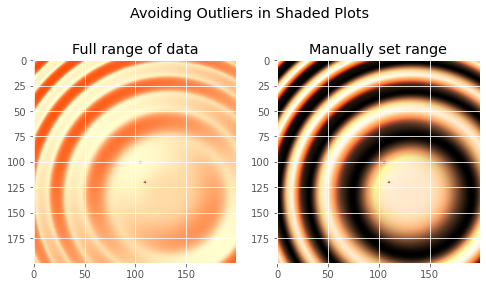

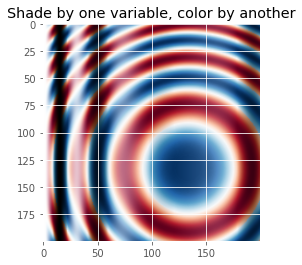

In [32]:

from matplotlib.colors import LightSource, Normalize


def display_colorbar():
    """Display a correct numeric colorbar for a shaded plot."""
    y, x = np.mgrid[-4:2:200j, -4:2:200j]
    z = 10 * np.cos(x**2 + y**2)

    cmap = plt.cm.copper
    ls = LightSource(315, 45)
    rgb = ls.shade(z, cmap)

    fig, ax = plt.subplots()
    ax.imshow(rgb, interpolation='bilinear')

    # Use a proxy artist for the colorbar...
    im = ax.imshow(z, cmap=cmap)
    im.remove()
    fig.colorbar(im)

    ax.set_title('Using a colorbar with a shaded plot', size='x-large')


def avoid_outliers():
    """Use a custom norm to control the displayed z-range of a shaded plot."""
    y, x = np.mgrid[-4:2:200j, -4:2:200j]
    z = 10 * np.cos(x**2 + y**2)

    # Add some outliers...
    z[100, 105] = 2000
    z[120, 110] = -9000

    ls = LightSource(315, 45)
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4.5))

    rgb = ls.shade(z, plt.cm.copper)
    ax1.imshow(rgb, interpolation='bilinear')
    ax1.set_title('Full range of data')

    rgb = ls.shade(z, plt.cm.copper, vmin=-10, vmax=10)
    ax2.imshow(rgb, interpolation='bilinear')
    ax2.set_title('Manually set range')

    fig.suptitle('Avoiding Outliers in Shaded Plots', size='x-large')


def shade_other_data():
    """Demonstrates displaying different variables through shade and color."""
    y, x = np.mgrid[-4:2:200j, -4:2:200j]
    z1 = np.sin(x**2)  # Data to hillshade
    z2 = np.cos(x**2 + y**2)  # Data to color

    norm = Normalize(z2.min(), z2.max())
    cmap = plt.cm.RdBu

    ls = LightSource(315, 45)
    rgb = ls.shade_rgb(cmap(norm(z2)), z1)

    fig, ax = plt.subplots()
    ax.imshow(rgb, interpolation='bilinear')
    ax.set_title('Shade by one variable, color by another', size='x-large')

display_colorbar()
avoid_outliers()
shade_other_data()
plt.show()

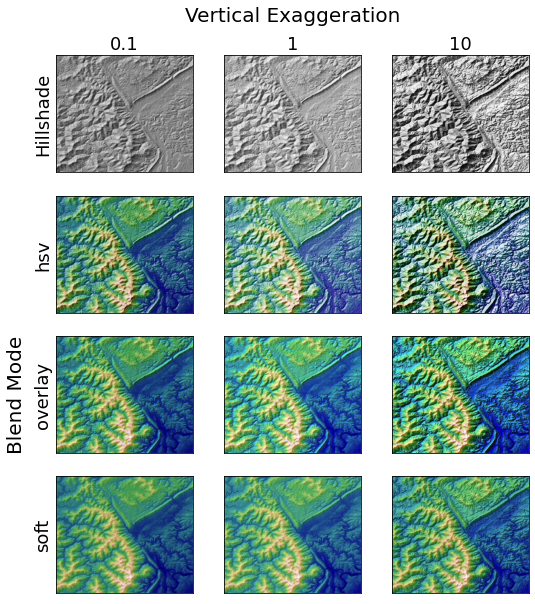

In [15]:
"""
Demonstrates the visual effect of varying blend mode and vertical exaggeration
on "hillshaded" plots.

Note that the "overlay" and "soft" blend modes work well for complex surfaces
such as this example, while the default "hsv" blend mode works best for smooth
surfaces such as many mathematical functions.

In most cases, hillshading is used purely for visual purposes, and *dx*/*dy*
can be safely ignored. In that case, you can tweak *vert_exag* (vertical
exaggeration) by trial and error to give the desired visual effect. However,
this example demonstrates how to use the *dx* and *dy* kwargs to ensure that
the *vert_exag* parameter is the true vertical exaggeration.
"""

from matplotlib.cbook import get_sample_data
from matplotlib.colors import LightSource

dem = np.load(get_sample_data('jacksboro_fault_dem.npz', asfileobj= False))
z = dem['elevation']

#-- Optional dx and dy for accurate vertical exaggeration --------------------
# If you need topographically accurate vertical exaggeration, or you don't want
# to guess at what *vert_exag* should be, you'll need to specify the cellsize
# of the grid (i.e. the *dx* and *dy* parameters).  Otherwise, any *vert_exag*
# value you specify will be relative to the grid spacing of your input data
# (in other words, *dx* and *dy* default to 1.0, and *vert_exag* is calculated
# relative to those parameters).  Similarly, *dx* and *dy* are assumed to be in
# the same units as your input z-values.  Therefore, we'll need to convert the
# given dx and dy from decimal degrees to meters.
dx, dy = dem['dx'], dem['dy']
dy = 111200 * dy
dx = 111200 * dx * np.cos(np.radians(dem['ymin']))
#-----------------------------------------------------------------------------

# Shade from the northwest, with the sun 45 degrees from horizontal
ls = LightSource(azdeg=315, altdeg=45)
cmap = plt.cm.gist_earth

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(8, 9))
plt.setp(axes.flat, xticks=[], yticks=[])

# Vary vertical exaggeration and blend mode and plot all combinations
for col, ve in zip(axes.T, [0.1, 1, 10]):
    # Show the hillshade intensity image in the first row
    col[0].imshow(ls.hillshade(z, vert_exag=ve, dx=dx, dy=dy), cmap='gray')

    # Place hillshaded plots with different blend modes in the rest of the rows
    for ax, mode in zip(col[1:], ['hsv', 'overlay', 'soft']):
        rgb = ls.shade(z, cmap=cmap, blend_mode=mode,
                       vert_exag=ve, dx=dx, dy=dy)
        ax.imshow(rgb)

# Label rows and columns
for ax, ve in zip(axes[0], [0.1, 1, 10]):
    ax.set_title('{0}'.format(ve), size=18)
for ax, mode in zip(axes[:, 0], ['Hillshade', 'hsv', 'overlay', 'soft']):
    ax.set_ylabel(mode, size=18)

# Group labels...
axes[0, 1].annotate('Vertical Exaggeration', (0.5, 1), xytext=(0, 30),
                    textcoords='offset points', xycoords='axes fraction',
                    ha='center', va='bottom', size=20)
axes[2, 0].annotate('Blend Mode', (0, 0.5), xytext=(-30, 0),
                    textcoords='offset points', xycoords='axes fraction',
                    ha='right', va='center', size=20, rotation=90)
fig.subplots_adjust(bottom=0.05, right=0.95)

plt.show()

# note - if you get a sample data not found error here run
#  conda install -c conda-forge mpl_sample_data 
# after activating your geopy environment

##  Cartopy

Is a mapping and imaging package originating from the Met. Office in the UK. The home page for the package is http://scitools.org.uk/cartopy/. Like many python packages, the [documentation](http://scitools.org.uk/cartopy/docs/latest/index.html) is patchy and the best way to learn is to try to do things and ask other people who have figured out this and that. 

We are going to work through a number of the examples and try to extend them to do the kinds of things you might find interesting and useful in the future. The examples are in the form of a [gallery](http://scitools.org.uk/cartopy/docs/latest/gallery.html)

You might also want to look at the [list of map projections](http://scitools.org.uk/cartopy/docs/latest/crs/projections.html) from time to time. Not all maps can be plotted in every projection (sometimes because of bugs and sometimes because they are not supposed to work for the data you have) but you can try them and see what happens.

Cartopy is built on top of a lot of the matplotlib graphing tools. It works by introducing a series of projections associated with the axes of a graph. On top of that there is a big toolkit for reading in images, finding data from standard web feeds, and manipulating geographical objects. Many, many libraries are involved and sometimes things break. Luckily the installation that is built for this course is about as reliable as we can ever get. I'm just warning you, though, that it can be quite tough if you want to put this on your laptop from scratch.





We have a number of imports that we will need almost every time. 

If we are going to plot anything then we need to include **matplotlib**.




In [16]:
import cartopy
import cartopy.crs as ccrs

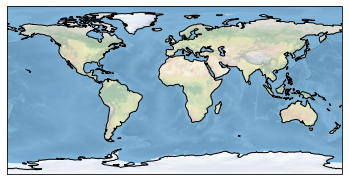

In [17]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ax.coastlines()
plt.show()

The simplest plot: global map using the default image built into the package and adding coastlines


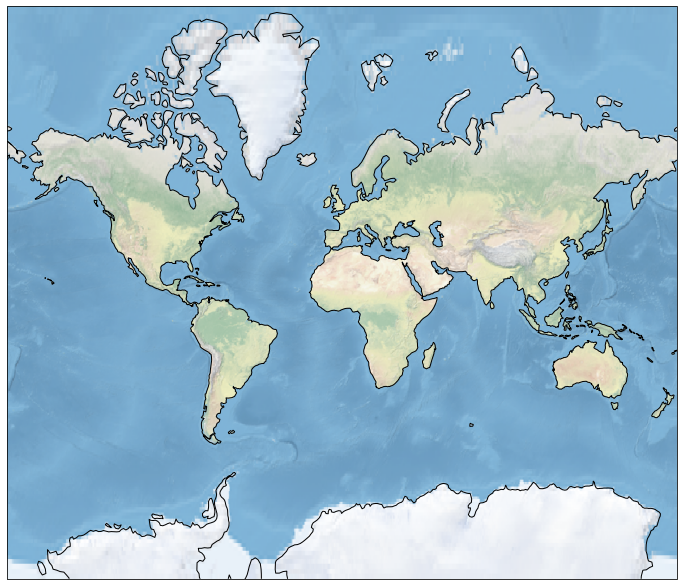

In [18]:

fig = plt.figure(figsize=(12, 12))
ax  = plt.axes(projection=ccrs.Mercator())

    # make the map global rather than have it zoom in to
    # the extents of any plotted data
    
ax.set_global()
ax.coastlines()  
ax.stock_img()

plt.show()

Try changing the projection - either look at the list in the link I gave you above or use the tab-completion feature of iPython to see what ``ccrs`` has available ( not everything will be a projection, but you can see what works and what breaks ).

Here is how you can plot a region instead of the globe:


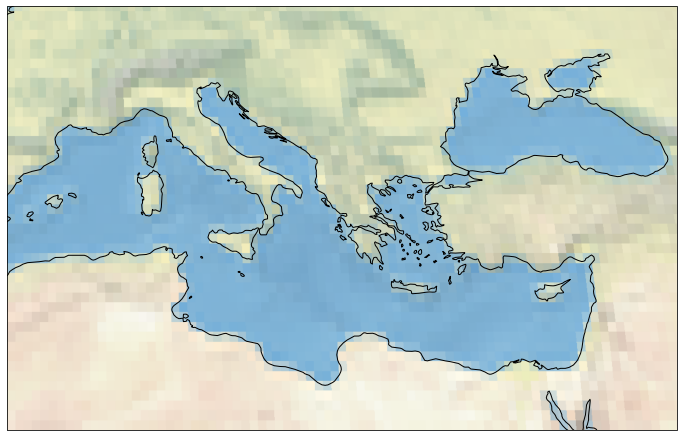

In [19]:
fig = plt.figure(figsize=(12, 12))
ax  = plt.axes(projection=ccrs.Robinson())    
ax.set_extent([0, 40, 28, 48])

ax.coastlines(resolution='50m')  
ax.stock_img()
plt.show()

In [13]:
help(ax.stock_img)

Help on method stock_img in module cartopy.mpl.geoaxes:

stock_img(name='ne_shaded') method of cartopy.mpl.geoaxes.GeoAxesSubplot instance
    Add a standard image to the map.
    
    Currently, the only (and default) option is a downsampled version of
    the Natural Earth shaded relief raster.



<div class="challenge">

### Challenge

- Make a Mollweide plot of Australia.

<details>
<summary>Solution</summary>

```python
fig = plt.figure(figsize=(12, 12), facecolor="none")
ax  = plt.axes(projection=ccrs.Mollweide(central_longitude=130))
ax.set_extent([112, 153, -43, -10]) 

ax.coastlines(resolution='50m')  
ax.stock_img()
plt.show()
```

</details>
</div>

### NetCDF data and more Cartopy

In [15]:
#We use the scipy netcdf reader
import scipy.io

In [16]:
#Set the file name and read in the data
filename="../data/topodata.nc"
data = scipy.io.netcdf.netcdf_file(filename,'r')

#Netcdf could be stored with multiple different formats
#Print out these data
data.variables

OrderedDict([('X', <scipy.io.netcdf.netcdf_variable at 0x7fad40e1a490>),
             ('Y', <scipy.io.netcdf.netcdf_variable at 0x7fad40d9afd0>),
             ('elev', <scipy.io.netcdf.netcdf_variable at 0x7fad40d9a640>)])

In [17]:
#Set each layer as a variable
worldbath=data.variables['elev'][:]
lons=data.variables['X'][:]
lats=data.variables['Y'][:]

In [18]:
print(worldbath.shape)
print(lons.shape)
print(lats.shape)

(2160, 4320)
(4320,)
(2160,)


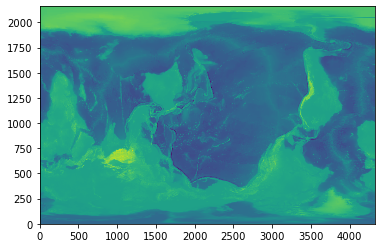

In [20]:
#A quick plot of the main dataset
plt.pcolormesh(worldbath)
plt.show()

matplotlib lib has no native understaning of geocentric coordinate systems.
Cartopy does. 

matplotlib commands with "x" and "y" values of latitudes and longitudes make sense too!

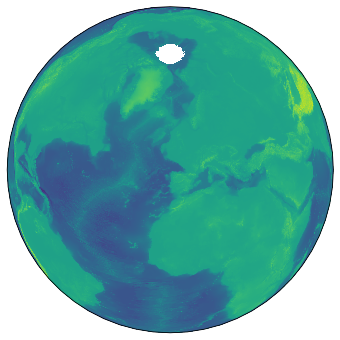

In [21]:
#A more earthly plot of the data
fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection=ccrs.Orthographic(-10, 45))
ax.pcolormesh(lons,lats,worldbath, transform=ccrs.PlateCarree())
plt.show()

This is fairly high resolution for what we are looking at, so we could downsample the grid to save some time.
Also, not all grids are global, so we can subset the data to represent perhaps a small area we may have a grid/image over.

In [22]:
#Take a subset of the data by slicing the array with indexing
subbath=worldbath[1200:1650:2,1300:1900:2]
#Take the corresponding lat/lon values as the main data array
sublons=lons[1300:1900:2]
sublats=lats[1200:1650:2]

<ipython-input-23-3d2618499013>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_xticklabels([-5000,-2500,0,1000],color='white',fontsize=8)


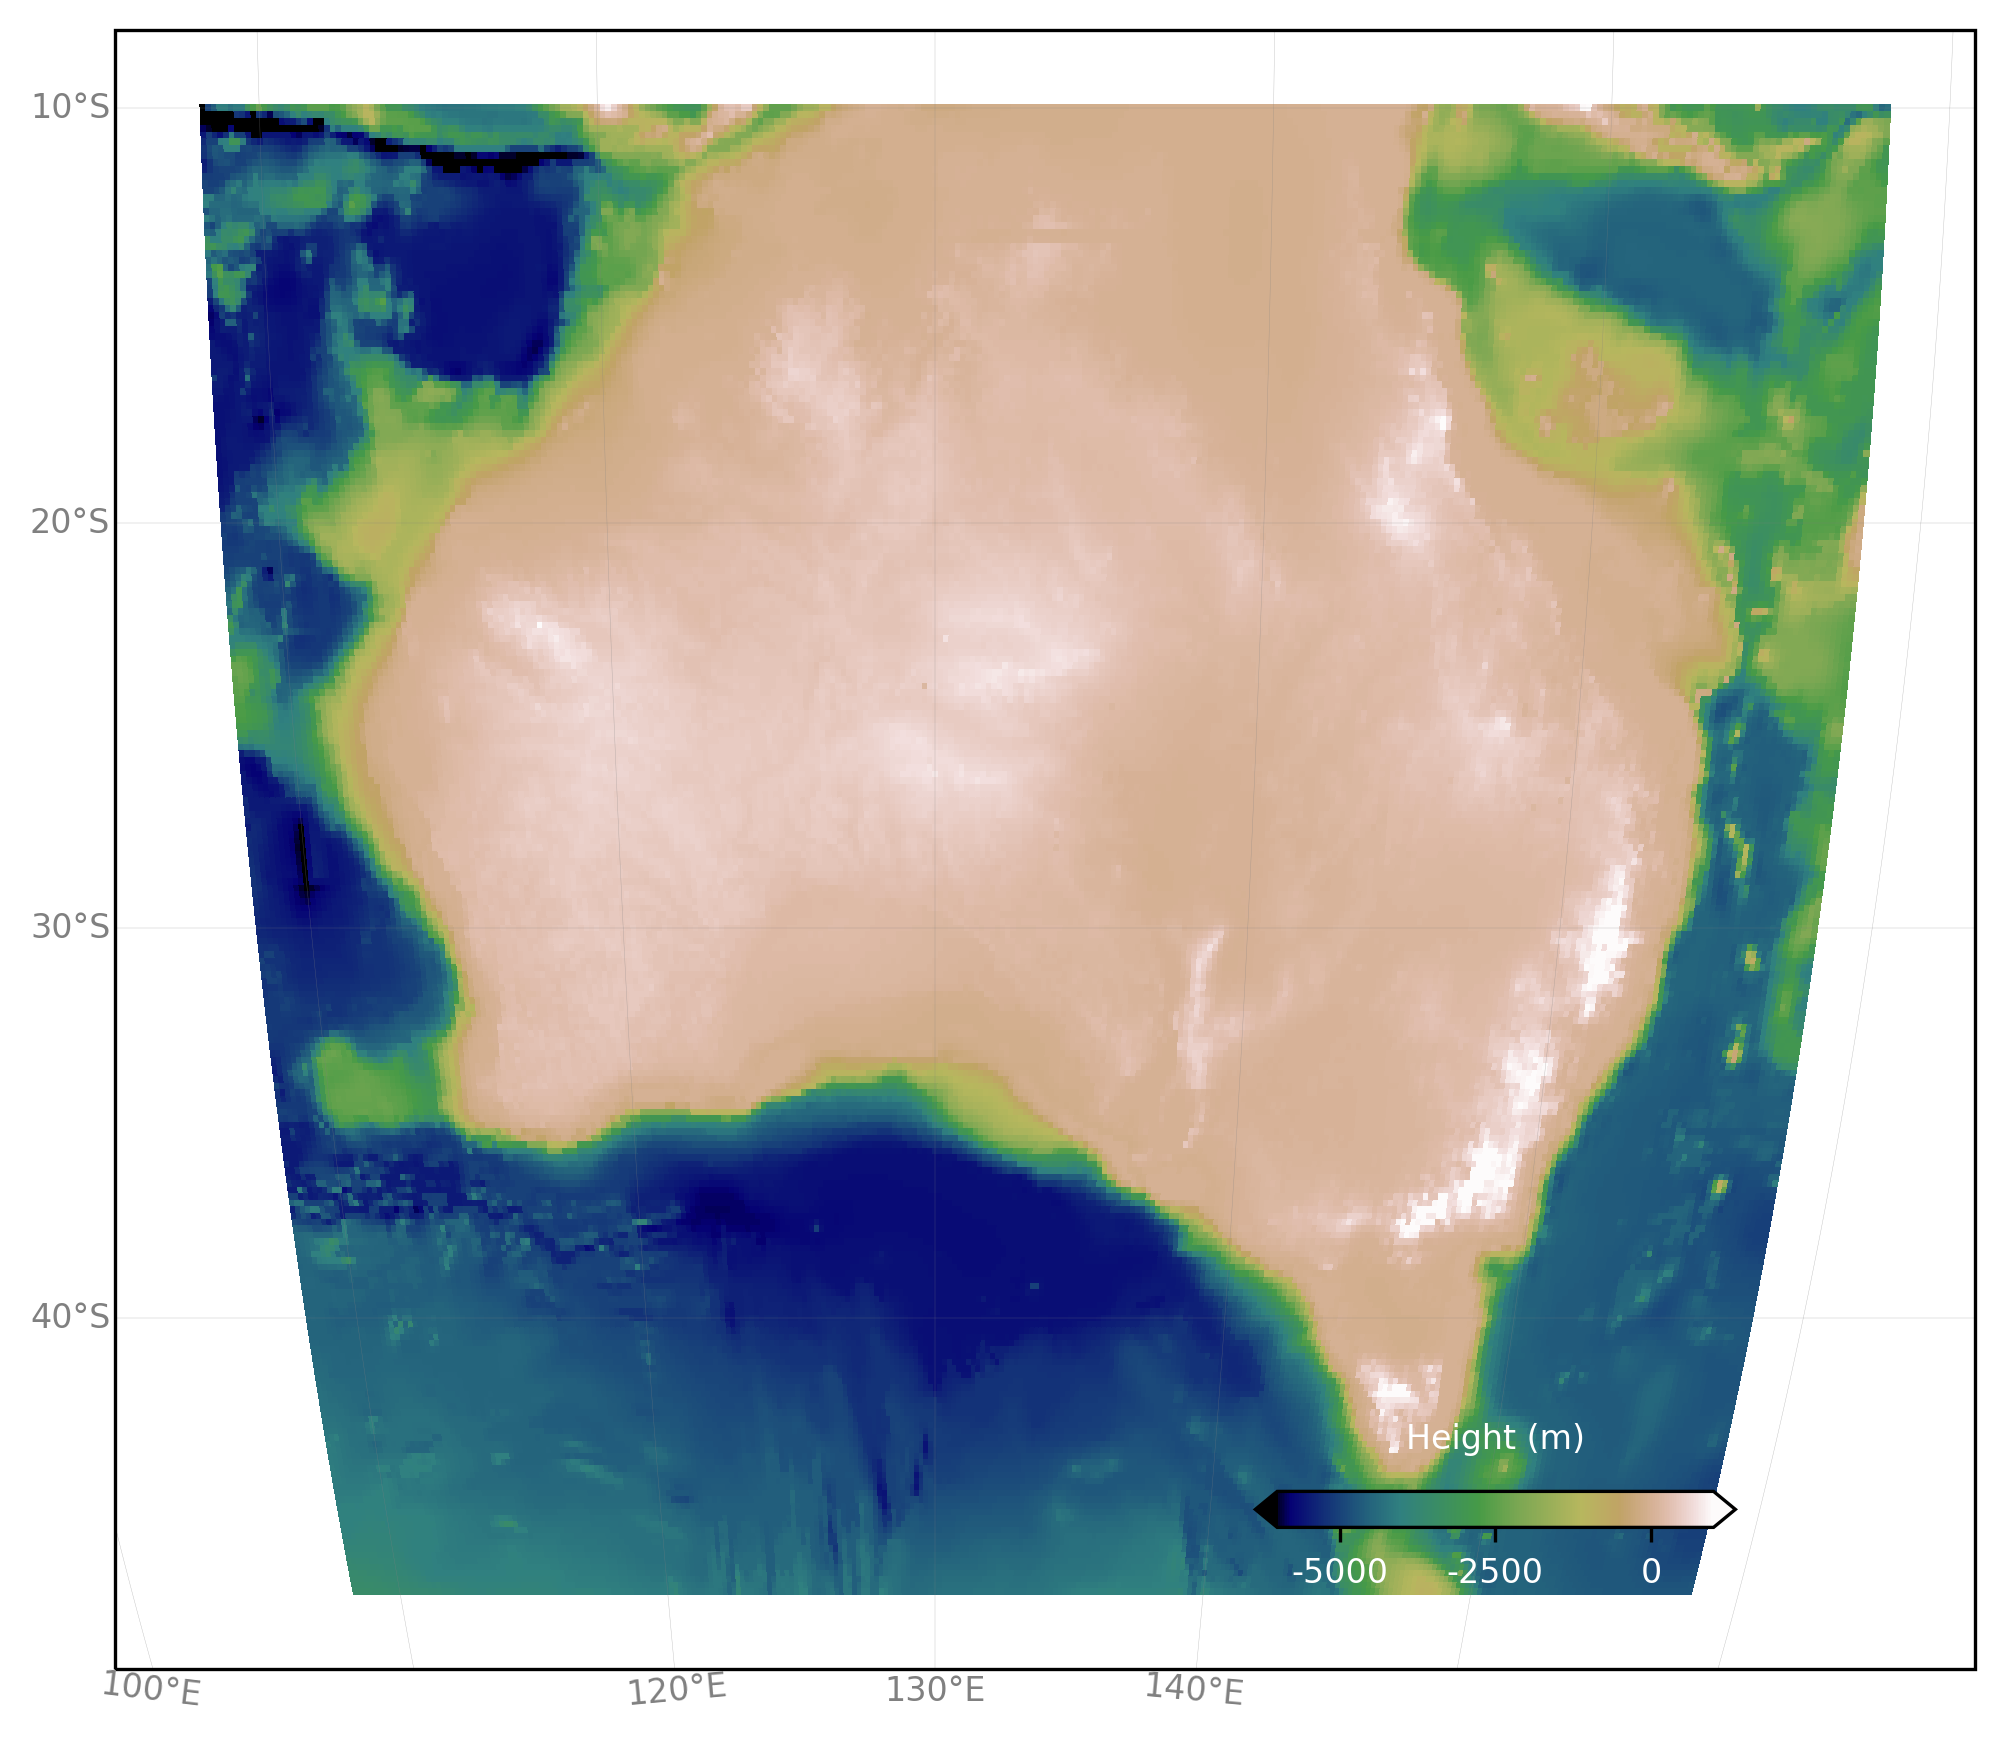

In [23]:
#Make the figure object
fig = plt.figure(figsize=(8, 8),dpi=300)

#Create the main plot axes
ax = plt.axes(projection=ccrs.Mollweide(central_longitude=130))

#Plot the data on the axes
mapdat=ax.pcolormesh(sublons,sublats,subbath, 
              transform=ccrs.PlateCarree(),cmap=plt.cm.gist_earth,vmax=1000,vmin=-6000)

#Add background oceans, land
#ax.add_feature(cartopy.feature.OCEAN, zorder=0)
#ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='blue')  

#Add Gridlines
gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
             linewidth=0.1, color='gray', alpha=0.5, linestyle='-',
             x_inline=False, y_inline=False)

gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels = True

gl.xlabel_style = {'size': 8, 'color': 'gray'}
gl.ylabel_style = {'size': 8, 'color': 'gray'}


#Add a colorbar axes
cbaxes = fig.add_axes([0.60, 0.22, 0.2, 0.015],frameon=True,facecolor='white')

#Add the colorbar to the axes with the data
cbar = plt.colorbar(mapdat, cax = cbaxes,orientation="horizontal",extend='both')

#Fix additional options of the colorbar
cbar.set_label('Height (m)', labelpad=-40,fontsize=8,color='white')
cbar.ax.set_xticklabels([-5000,-2500,0,1000],color='white',fontsize=8)

#Show the plot!
plt.show()

<div class="challenge">

### Challenge

- Re-make the last map, but with the full topo dataset.
- Crop the image.
- Add coastlines back in.
- Pick a different color scale. 
- Move the colorbar to the bottom left.

<details>
<summary>Solution</summary>

```python
#Still make the subsets, but at full res, otherwise plot takes long time
subbath=worldbath[1200:1650,1300:1900]
sublons=lons[1300:1900]
sublats=lats[1200:1650]

#Make the figure object
fig = plt.figure(figsize=(8, 8),dpi=300)

#Create the main plot axes
ax = plt.axes(projection=ccrs.Mollweide(central_longitude=130))

#Plot the data on the axes
mapdat=ax.pcolormesh(sublons,sublats,subbath, 
              transform=ccrs.PlateCarree(),cmap=plt.cm.terrain,vmax=1000,vmin=-6000)

#Add coastlines, restrict the image to an extent
ax.coastlines(resolution='50m',color='black')
ax.set_extent([112, 153, -43, -10])    

#Add Gridlines
gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
             linewidth=0.1, color='gray', alpha=0.5, linestyle='-',
             x_inline=False, y_inline=False)

gl.top_labels = True
gl.bottom_labels = False
gl.right_labels = False
gl.left_labels = True
gl.xlabel_style = {'size': 8, 'color': 'gray'}
gl.ylabel_style = {'size': 8, 'color': 'gray'}

#Add a colorbar axes
cbaxes = fig.add_axes([0.20, 0.22, 0.2, 0.015],frameon=True,facecolor='white')

#Add the colorbar to the axes with the data
cbar = plt.colorbar(mapdat, cax = cbaxes,orientation="horizontal",extend='both')

#Fix additional options of the colorbar
cbar.set_label('Height (m)', labelpad=-40,fontsize=8,color='white')
cbar.ax.set_xticklabels([-5000,-2500,0,1000],color='white',fontsize=8)

#Show the plot!
plt.show()
```

</details>
</div>